## Competitie model: <br>
Floris Menninga <br>
Datum: 08-04-2025 <br>
Versie: 1

In [4]:
#!pip install pandas numpy seaborn
! pip install scikit-learn
#from imblearn.over_sampling import SMOTE

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

DEPRECATION: Loading egg at /home/floris/anaconda3/lib/python3.12/site-packages/exo-0.0.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/floris/anaconda3/lib/python3.12/site-packages/nvidia_ml_py-12.560.30-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/floris/anaconda3/lib/python3.12/site-packages/tinygrad-0.10.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/floris/anaconda3/lib/python3.12/site-packages/uvloop-0.21.0-py3.12-linu

In [5]:
# Maak en verbind met database:
import sqlite3
import pandas as pd


try:

    with open("/home/floris/Documenten/git_repo/Hanze_ML_Demo/DB/database.sql", "r") as sql_file:
        sql_script = sql_file.read()


    db = sqlite3.connect(database="DB/database.db")
    cursor = db.cursor()
    
    cursor.executescript(sql_script)
    db.commit()

except Exception as errortje:
    print("Error: De database kon niet aangemaakt worden...")
    print(errortje)


df = pd.read_sql_query("select * from vragenlijst_data;", db)

In [6]:
df.head()

,id,social_media,mp3_speler,krant,telefoon,bellen_of_email,smileys,werkelijke_leeftijd,voorspelde_generatie
0,1,1,0,0,12,1,1,19,None
1,2,1,0,0,11,1,1,21,None
2,3,1,0,0,12,1,1,22,None
3,4,1,0,0,10,1,1,24,None
4,5,1,0,0,11,1,1,25,None


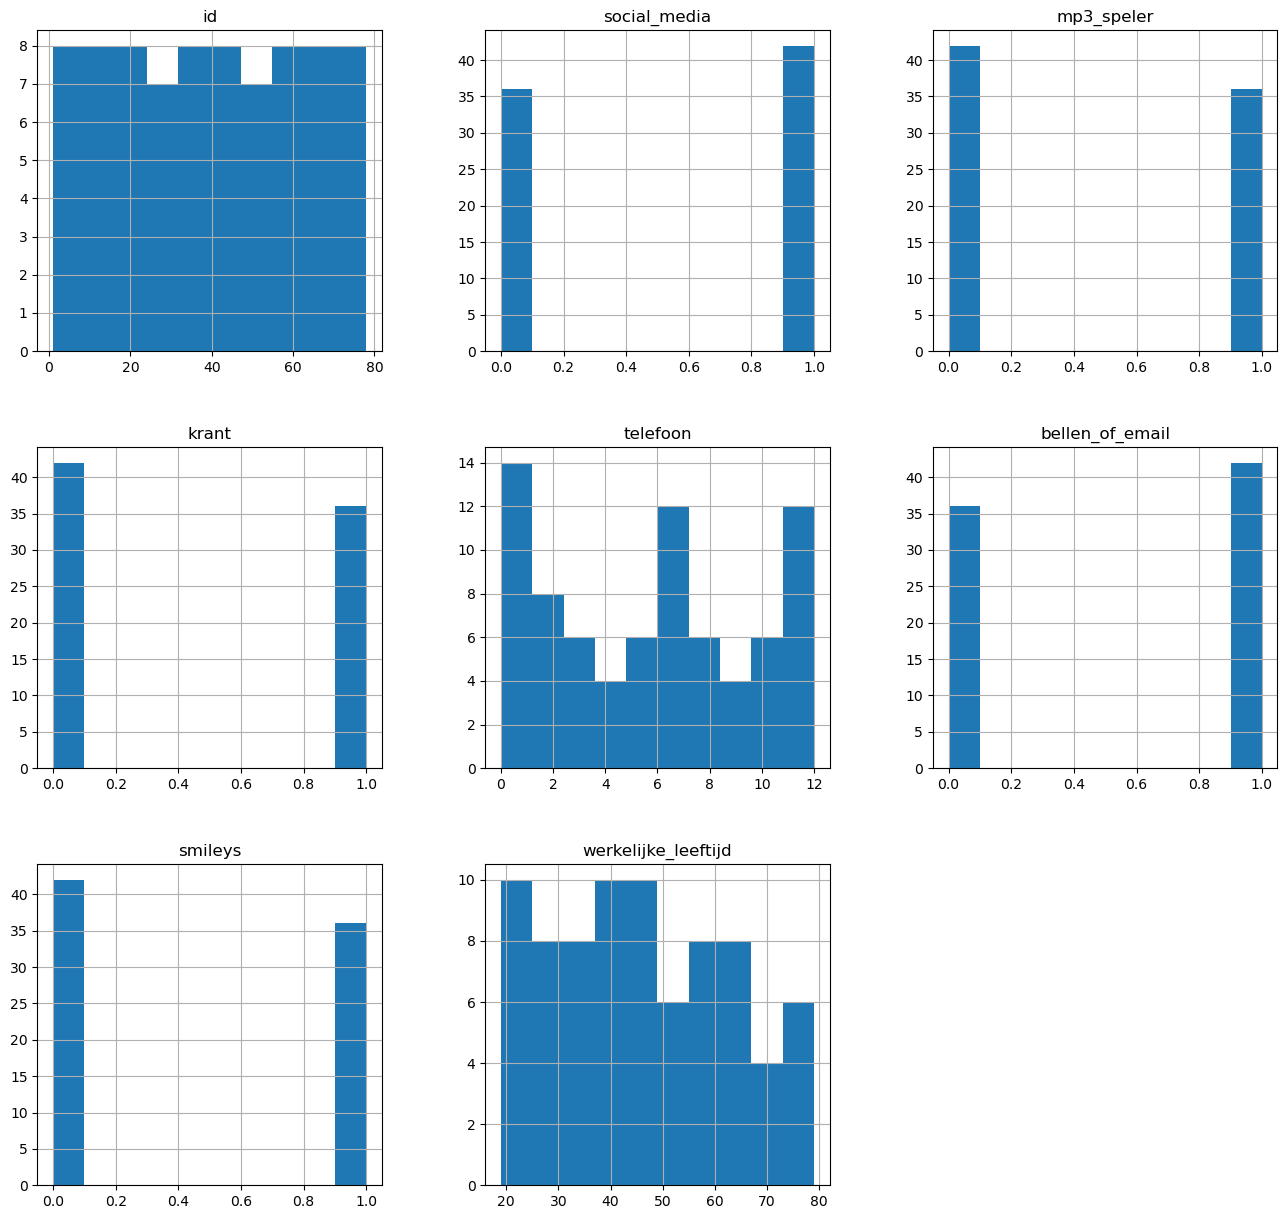

In [7]:
df.hist( figsize=(16.0, 15));

Transformatie:


In [ ]:
# logdata = np.sqrt(mhs_df[["leeftijd", "sex", "MHS", "lengte", "bmi", "slaapscore", "maandinkomen", "beweging-per-week", "bovendruk", "onderdruk", "tv-per-dag"]])
# lifelines_df_transformed_test = pd.DataFrame()

# for attribute in ["leeftijd", "sex", "MHS", "lengte", "bmi", "slaapscore", "maandinkomen", "beweging-per-week", "bovendruk", "onderdruk", "tv-per-dag"]:
#     index = codebook["attribute"].index(attribute)
#     codebook["unit"][index] = "-"
#     lifelines_df_transformed_test.rename(columns={attribute: attribute}, inplace=True)
#     lifelines_df_transformed_test[attribute] = logdata[attribute]

# pd.DataFrame(codebook).set_index("attribute")

Text(0.5, 1.0, 'Paarsgewijze correlaties')

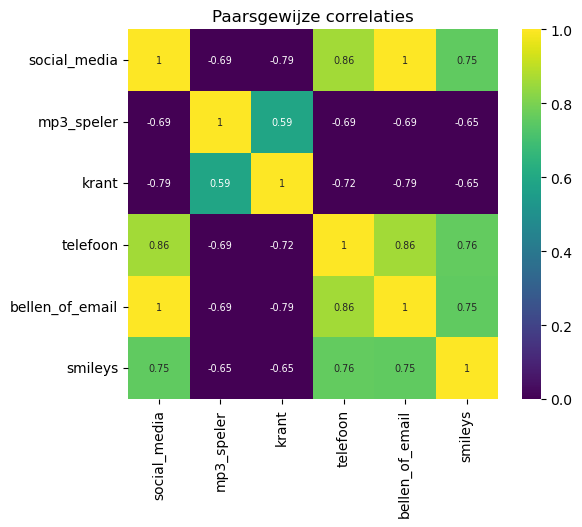

In [8]:
axs = sns.heatmap(df[["social_media", "mp3_speler", "krant", "telefoon", "bellen_of_email", "smileys"]].corr(), annot=True, annot_kws={"fontsize": "x-small"}, cmap="viridis", vmin=0.0, vmax=1.0, square=True)
axs.set_title("Paarsgewijze correlaties")

In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
import joblib

In [195]:
df["telefoon"]

0     12
1     11
2     12
3     10
4     11
5     12
6     10
7      9
8      8
9      8
10     7
11     7
12     6
13     6
14     6
15     5
16     5
17     4
18     4
19     3
20     3
21     2
22     2
23     1
24     1
25     0
26     0
27     0
28     0
29     9
30     5
31     8
32     2
33    12
34     3
35     7
36     1
37    10
38     2
Name: telefoon, dtype: int64

In [10]:
features_ordinal = df["telefoon"]
features_categorical = df[["mp3_speler", "krant", "bellen_of_email", "smileys"]]

to_predict = df["voorspelde_generatie"]

all_features = features_ordinal + features_categorical



In [118]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


X_ordinal = features_ordinal
X_categorical = features_categorical

# Dit is voor de vraag met afbeelding van de 12 telefoons waaruit de gebruiker moet kiezen. ordinaal omdat het productiejaar oploopt.
onehot_encoder = OrdinalEncoder(
    categories=[1,2,3,4,5,6,7,8,9,10,11,12],
    handle_unknown='use_encoded_value', 
    unknown_value=-1
)

#X_ordinal_encoded = onehot_encoder.fit_transform(X_ordinal)

#X = np.hstack((X_ordinal, X_categorical))

y = df[["werkelijke_leeftijd"]]
#y = target_imputer.fit_transform(y_not_imputed.values.reshape(-1, 1)).ravel()


# validation_df = pd.read_csv("/home/floris/Documenten/ML/Competitie_Nieuw/competition-train-noclass(1).csv")
# validation_df.index += 1

# validation_y_not_imputed = validation_df[features]



In [139]:
test = df[["telefoon"]]
test

,telefoon
0,12
1,11
2,12
3,10
4,11
5,12
6,10
7,9
8,8
9,8


In [11]:
X = pd.concat([features_categorical,features_ordinal] , axis=1)
X

,mp3_speler,krant,bellen_of_email,smileys,telefoon
0,0,0,1,1,12
1,0,0,1,1,11
2,0,0,1,1,12
3,0,0,1,1,10
4,0,0,1,1,11
...,...,...,...,...,...
73,0,0,0,0,3
74,1,0,1,1,7
75,0,1,0,0,1
76,0,0,1,1,10


In [12]:
print(df[["mp3_speler", "krant", "bellen_of_email", "smileys"]].shape)
print(df["werkelijke_leeftijd"].shape)

y = df["werkelijke_leeftijd"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

(78, 4)
(78,)


((62, 5), (16, 5), (62,), (16,))

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from mapie.regression import MapieRegressor
from sklearn.model_selection import KFold
from sklearn.svm import SVR

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    # ("ordinal", OrdinalEncoder(
    # categories=[[0,1],[0,1],[0,1],[0,1],[1,2,3,4,5,6,7,8,9,10,11,12]],
    # handle_unknown='use_encoded_value', 
    # unknown_value=-1)),
     ("SVR", SVR(kernel='linear')),
     ("mapie", MapieRegressor(estimator=SVR(kernel='linear'), method="plus", cv=KFold(n_splits=10, shuffle=True)) )

])

pipeline.fit(X_train, y_train)

# y_train_pred = pipeline.predict(X_train)

# y_test_pred  = pipeline.predict(X_test)

# svr = SVR(kernel="rbf", C=10, epsilon=0.2, gamma="scale")
# mapie = MapieRegressor(estimator=svr, method="plus", cv=KFold(n_splits=10, shuffle=True, random_state=42))
# mapie.fit(X_train, y_train)

# y_pred, y_interval = mapie.predict(X_test, alpha=0.1)  # 90% intervals
# lower = y_interval[:, 0, 0]
# upper = y_interval[:, 1, 0]


TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'SVR(kernel='linear')' (type <class 'sklearn.svm._classes.SVR'>) doesn't

In [28]:
    features_ordinal = df["telefoon"]
    features_categorical = df[["mp3_speler", "krant", "bellen_of_email", "smileys"]]

    to_predict = df["voorspelde_generatie"]

    X = pd.concat([features_categorical,features_ordinal] , axis=1)

    print(df[["mp3_speler", "krant", "bellen_of_email", "smileys"]].shape)
    print(df["werkelijke_leeftijd"].shape)

    y = df["werkelijke_leeftijd"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        # ("ordinal", OrdinalEncoder(
        # categories=[[0,1],[0,1],[0,1],[0,1],[1,2,3,4,5,6,7,8,9,10,11,12]],
        # handle_unknown='use_encoded_value', 
        # unknown_value=-1)),
        ("SVR", SVR(kernel="linear"))
    ])

    pipeline.fit(X_train, y_train)

    y_train_pred = pipeline.predict(X_train)

    y_test_pred  = pipeline.predict(X_test)


(78, 4)
(78,)


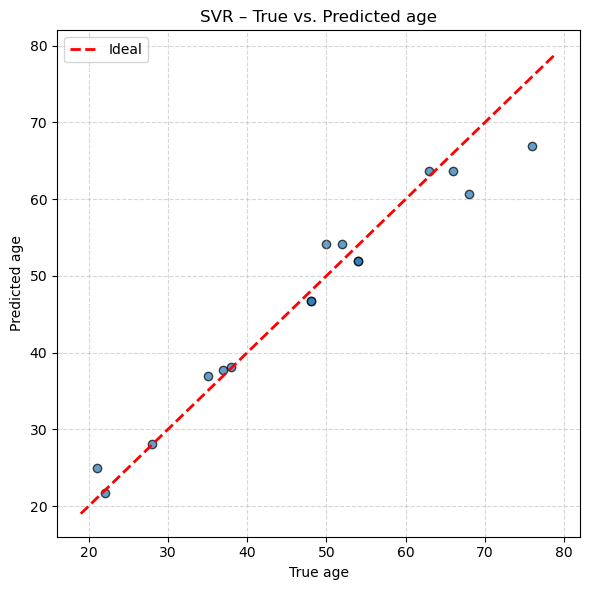

In [29]:

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, edgecolor='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Ideal')
plt.title('SVR – True vs. Predicted age')
plt.xlabel('True age')
plt.ylabel('Predicted age')
plt.grid(True, ls='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_param_grid = {
    'C': [0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'epsilon': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],  # for non-linear kernels
    'degree': [2, 3, 4],  # only for poly kernel
    'tol': [1e-1, 1e-3, 1e-5],
    'cache_size': [1000]
}

svr_grid = GridSearchCV(
    SVR(),
    svr_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',  # or 'r2', 'neg_mean_absolute_error'
    n_jobs=-1,
    verbose=1
)

# SVR(C=100.0, cache_size=1000, degree=2, epsilon=0.2, gamma='auto', tol=0.1)
svr_grid.fit(X, y)

Fitting 5 folds for each of 7560 candidates, totalling 37800 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0],
                         'cache_size': [1000], 'degree': [2, 3, 4],
                         'epsilon': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5],
                         'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'tol': [0.1, 0.001, 1e-05]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# # Test:


# validation_df = pd.read_csv("/home/floris/Documenten/ML/Competitie_Nieuw/competition-train-noclass(1).csv")


# X_not_imputed = mhs_df[self.all_features]

# X_ordinal = X_not_imputed[self.features_ordinal]
# X_continuous = X_not_imputed[self.features_continuous]


# # Imputeren van NA's:
# X_ordinal_imputed = self.ordinal_imputer.transform(X_ordinal)
# X_continuous_imputed = self.continuous_imputer.fit_transform(X_continuous)

# # Onehot encode de catagrorische ordinale features:
# X_ordinal_encoded = self.onehot_encoder.transform(X_ordinal_imputed)

# # Niet alle continue waarden hebben de zelfde eenheid, schaal ze:
# X_continuous_scaled = self.continuous_scaler.fit_transform(X_continuous_imputed)

# # Combineer features:
# X = np.concatenate((X_ordinal_encoded, X_continuous_scaled), axis=1)

# # Voorspel en zet om in boolean array:
# prediction = self.model.predict(X)

# (X_test_imputed, y_test)

In [8]:

# Test:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer


In [ ]:
# from sklearn.preprocessing import OrdinalEncoder
# from sklearn.impute import SimpleImputer
# from sklearn.impute import KNNImputer
# # Imputeer NA's:

#feature_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# feature_imputer = IterativeImputer(random_state=0)
# feature_imputer.fit(X_train_not_imputed)

# X_train_imputed = feature_imputer.transform(X_train_not_imputed)

# X_test_imputed = feature_imputer.transform(X_test_not_imputed)

# target_imputer = KNNImputer(n_neighbors=2, weights="uniform")
# #target_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# y_train = target_imputer.fit_transform(y_train_not_imputed.values.reshape(-1, 1)).ravel()
# y_test = target_imputer.transform(y_test_not_imputed.values.reshape(-1, 1)).ravel()



Hoe dragen de features bij?

In [32]:
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(k=7).fit(X, y)

pd.DataFrame({"Attribute": all_features, "Score": selector.scores_}).sort_values("Score", ascending=False).set_index("Attribute")

NameError: name 'X' is not defined

In [ ]:
# from sklearn.preprocessing import OneHotEncoder


# encoder = OrdinalEncoder()
# encoder.fit(X_train_imputed)

# X_train_onehot = encoder.transform(X_train_imputed)

# X_test_onehot = encoder.transform(X_test_imputed)

In [ ]:
# print(f"Verdeling voor SMOTE: \n {pd.Series(y_train).value_counts()} \n")

# # De "Auto" sampling strategy werkte niet. 
# smote = SMOTE(sampling_strategy={
#     1.0: 800,   
#     2.0: 1200,   
#     3.0: 2500,
#     5.0: 5000  
# }, k_neighbors=5)

# X_train_smote, y_train_smote = smote.fit_resample(X_train_onehot, y_train)

# print(f"Verdeling na SMOTE: \n {pd.Series(y_train_smote).value_counts()}")

In [10]:
#!pip install catboost

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import HistGradientBoostingClassifier



models = [
    DummyClassifier,
    DecisionTreeClassifier,
    GaussianNB,
    KNeighborsClassifier,
    RandomForestClassifier,
    LinearDiscriminantAnalysis,
    AdaBoostClassifier,
    MLPClassifier,
    SVC,
    GaussianProcessClassifier,
    GradientBoostingClassifier,
    ExtraTreesClassifier,
    BaggingClassifier,
    RidgeClassifier,
    SGDClassifier,
    HistGradientBoostingClassifier,
    
]

# Maak dict met scores voor elk model:
score_dict = {}

for model in models:
    model_name = model()
    model_name.fit(X, y)
    score_dict[model_name] = model_name.score(X, y)
    


/home/floris/Documenten/ML/Competitie_Nieuw/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/tmp/ipykernel_126732/1258411724.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Model", y="Score", data=model_scores, palette="Greens")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'DummyClassifier()'),
  Text(1, 0, 'SGDClassifier()'),
  Text(2, 0, 'GaussianNB()'),
  Text(3, 0, 'RidgeClassifier()'),
  Text(4, 0, 'LinearDiscriminantAnalysis()'),
  Text(5, 0, 'AdaBoostClassifier()'),
  Text(6, 0, 'SVC()'),
  Text(7, 0, 'KNeighborsClassifier()'),
  Text(8, 0, 'MLPClassifier()'),
  Text(9, 0, 'GradientBoostingClassifier()'),
  Text(10, 0, 'GaussianProcessClassifier()'),
  Text(11, 0, 'BaggingClassifier()'),
  Text(12, 0, 'RandomForestClassifier()'),
  Text(13, 0, 'DecisionTreeClassifier()'),
  Text(14, 0, 'ExtraTreesClassifier()'),
  Text(15, 0, 'HistGradientBoostingClassifier()')])

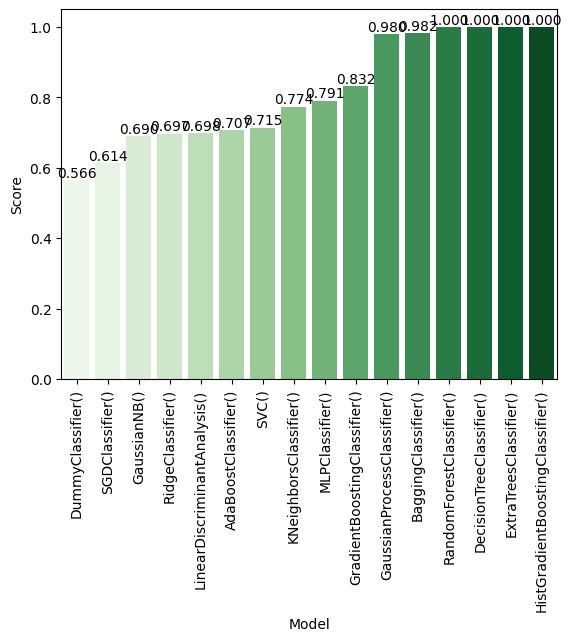

In [11]:
model_scores = pd.DataFrame(list(score_dict.items()), columns=["Model", "Score"])
model_scores = model_scores.sort_values(by=["Score"],ascending=True)

ax = sns.barplot(x="Model", y="Score", data=model_scores, palette="Greens")

for i in ax.containers:
    ax.bar_label(i,fmt="%.3f") # Voeg labels toe, rond af op 3 decimalen.

plt.xticks(rotation=90)

Met SimpleImputer: Adaboost: 0.677
Met KNNIMputer: Adaboost: 0.672

In [ ]:
# Cross-validatie
from sklearn.model_selection import cross_validate

metric_scores = {}
for model in models:
    scores = cross_validate(model(), X, y,cv=5, return_train_score=True)
    for key, val in scores.items():
        scores[key] = val.mean()
    metric_scores[f"{model.__name__}"] = scores
    
pd.DataFrame(metric_scores).T

In [ ]:
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

cv_results = {}
for model in models:
    model_name = model.__name__
    scores = cross_validate(model(), X, y, cv=5, 
                           scoring='accuracy', return_train_score=True)
    cv_results[model_name] = {
        'test_score': np.mean(scores['test_score']),
        'train_score': np.mean(scores['train_score']),
        'std': np.std(scores['test_score'])
    }

cv_df = pd.DataFrame(cv_results).T.reset_index()
cv_df = cv_df.rename(columns={'index': 'Model'})
cv_df = cv_df.sort_values('test_score', ascending=False)

plt.figure(figsize=(12, 6))
x = np.arange(len(cv_df))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))
bars1 = ax.bar(x - width/2, cv_df['test_score'], width, label='Validation Score', color='forestgreen')
bars2 = ax.bar(x + width/2, cv_df['train_score'], width, label='Training Score', color='lightgreen')

ax.errorbar(x - width/2, cv_df['test_score'], yerr=cv_df['std'], fmt='none', ecolor='black', capsize=5)

ax.set_ylabel('Accuracy Score')
ax.set_title('Cross-Validation Results (5-fold)')
ax.set_xticks(x)
ax.set_xticklabels(cv_df['Model'], rotation=90)
ax.legend()

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                   xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom', rotation=0, fontsize=8)

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()


In [ ]:
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import VotingClassifier

# # Try with different base models
# voting_clf = VotingClassifier(
#     estimators=[
#       #  ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
#         ('rf', RandomForestClassifier()),
#         ('svc', SVC(probability=True, class_weight='balanced'))
#     ],
#     voting='soft'
# )

# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
# ensemble_scores = cross_val_score(voting_clf, X_train_imputed, y_train, cv=cv, scoring='f1')
# print(f"Ensemble score: {ensemble_scores.mean():.3f}")

In [ ]:
top_model = model_scores.iloc[-1]["Model"]

print(f"Het beste model is: {top_model}")

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_validate

metric_scores = {}
k = 14

while k:
    X_select = SelectKBest(k=k).fit_transform(X, y)
    scores = cross_validate(SVC(probability=True, random_state=1), X, y, cv=5, return_train_score=True)
    for key, value in scores.items():
        scores[key] = value.mean()
    metric_scores[f"{k} features"] = scores
    k -= 1

(pd.DataFrame(metric_scores).T).head()

# optimal_features = 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.metrics import roc_curve, auc
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             BaggingClassifier, HistGradientBoostingClassifier)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

# Create dictionary of models to test
models = {
    'DummyClassifier': DummyClassifier(strategy='stratified', random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier(random_state=42), 
    'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
    'MLPClassifier': MLPClassifier(max_iter=500, random_state=42),
    'SVC': SVC(probability=True, random_state=1),
    'GaussianProcessClassifier': GaussianProcessClassifier(random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state=42),
    'BaggingClassifier': BaggingClassifier(random_state=42),
    'RidgeClassifier': CalibratedClassifierCV(RidgeClassifier(random_state=42)),
    'SGDClassifier': SGDClassifier(loss='log_loss', random_state=42),
    'HistGradientBoostingClassifier': HistGradientBoostingClassifier(random_state=42)
}

# Evaluate all models using cross-validation
results = {}
for name, model in models.items():
    print(f"Evaluating {name}...")
    try:
        # Get cross-validated predictions
        y_pred_proba = cross_val_predict(model, X, y, cv=5, method='predict_proba')
        
        # Calculate AUC
        fpr, tpr, _ = roc_curve(y, y_pred_proba[:, 1])
        roc_auc = auc(fpr, tpr)
        
        results[name] = {
            'auc': roc_auc,
            'fpr': fpr,
            'tpr': tpr
        }
        print(f"  AUC: {roc_auc:.3f}")
    except Exception as e:
        print(f"  Error with {name}: {e}")
        continue

# Sort results by AUC
sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1]['auc'], reverse=True)}

# Plot AUC scores
plt.figure(figsize=(12, 8))
plt.barh(list(sorted_results.keys()), [v['auc'] for v in sorted_results.values()], color='cornflowerblue')
plt.xlabel('AUC Score')
plt.title('Model Performance Comparison (AUC)')
plt.xlim(0.5, 1.0)  # AUC ranges from 0.5 (random) to 1.0 (perfect)
for i, v in enumerate([v['auc'] for v in sorted_results.values()]):
    plt.text(v + 0.01, i, f"{v:.3f}", va='center')
plt.tight_layout()
plt.show()

# Get top 3 models
top_models = list(sorted_results.keys())[:3]
print(f"\nTop performing models: {', '.join(top_models)}")

# Define parameter grids for the top models
param_grids = {}

# Create appropriate grid for each model type (examples for common top performers)
if 'AdaBoostClassifier' in top_models:
    param_grids['AdaBoostClassifier'] = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5, 1.0],
        'algorithm': ['SAMME', 'SAMME.R']
    }
    
if 'RandomForestClassifier' in top_models:
    param_grids['RandomForestClassifier'] = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
    
if 'GradientBoostingClassifier' in top_models:
    param_grids['GradientBoostingClassifier'] = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0]
    }
    
if 'HistGradientBoostingClassifier' in top_models:
    param_grids['HistGradientBoostingClassifier'] = {
        'max_iter': [100, 200],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [None, 5, 10]
    }
    
if 'SVC' in top_models:
    param_grids['SVC'] = {
    'C': [0.025,0.03, 0.035, 0.04, 0.05, 0.1],
    
    'kernel': ['linear'], #, 'rbf', 'poly', 'sigmoid'],

    'gamma': ['scale', 'auto', 0.0001, 0.001, 0.01, 0.1, 1],

    #'degree': [2, 3, 4],
    
}
    
if 'LinearDiscriminantAnalysis' in top_models:
    param_grids['LinearDiscriminantAnalysis'] = {
        'solver': ['svd', 'lsqr', 'eigen'],
        'shrinkage': [None, 'auto', 0.1, 0.5, 0.9]
    }

# Run grid search for the top models
best_models = {}
for model_name in top_models:
    if model_name in param_grids:
        print(f"\nOptimizing {model_name}...")
        grid_search = GridSearchCV(
            models[model_name], 
            param_grids[model_name], 
            cv=5, 
            scoring='roc_auc',
            n_jobs=-1
        )
        grid_search.fit(X, y)
        
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best AUC: {grid_search.best_score_:.3f}")
        
        # Save best model
        best_models[model_name] = {
            'model': grid_search.best_estimator_,
            'params': grid_search.best_params_,
            'auc': grid_search.best_score_
        }
    else:
        print(f"No parameter grid defined for {model_name}")

# Plot ROC curves for the best models
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line

# Original best models
for i, (name, data) in enumerate(list(sorted_results.items())[:3]):
    plt.plot(data['fpr'], data['tpr'], 
             label=f"{name} (Original, AUC = {data['auc']:.3f})")

# Optimized models after grid search (if any)
colors = ['darkorange', 'green', 'blue']
for i, (name, data) in enumerate(best_models.items()):
    if i < len(colors):
        # Get predictions from best model
        y_pred_proba = cross_val_predict(data['model'], X, y, cv=5, method='predict_proba')
        fpr, tpr, _ = roc_curve(y, y_pred_proba[:, 1])
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, color=colors[i], lw=2,
                 label=f"{name} (Optimized, AUC = {roc_auc:.3f})")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Best Models')
plt.legend(loc="lower right")
plt.show()

## Adaboost evaluatie:

In [ ]:
svc_param_grid = {
    'C': [0.025, 0.03,0.033, 0.035,0.038, 0.04, 0.05, 0.1],
    'kernel': ['linear'],  # 'rbf', 'poly', 'sigmoid'
    'tol': [1e-1, 1e-6],
    'shrinking': [True, False],
    'cache_size': [100, 500, 1000]
   # 'break_ties': [True, False]
    # 'degree': [2, 3, 4],
}

svc_grid = GridSearchCV(
    SVC(probability=True, random_state=42),
    svc_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
svc_grid.fit(X, y)
print(f"\nBeste parameters: {svc_grid.best_params_}")


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

svc_param_grid = {
    'C': [0.025, 0.03,0.033, 0.035,0.038, 0.04, 0.05, 0.1],
    'kernel': ['linear'],  # 'rbf', 'poly', 'sigmoid'
    'tol': [1e-1, 1e-3, 1e-6],
  #  'shrinking': [True, False],
    'cache_size': [100, 500, 1000]
   # 'break_ties': [True, False]
    # 'degree': [2, 3, 4],
}

svc_grid = GridSearchCV(
    SVC(probability=True, random_state=42),
    svc_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

svc_grid.fit(X, y)

print(f"\nBeste hyperparameters: {svc_grid.best_params_}")
print(f"AUC: {svc_grid.best_score_}")

best_svc = SVC(probability=True, random_state=1, **svc_grid.best_params_)

y_pred_proba = cross_val_predict(best_svc, X, y, cv=5, method='predict_proba')
fpr, tpr, _ = roc_curve(y, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Optimized SVC (AUC = {roc_auc})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Optimized SVC')
plt.legend(loc="lower right")
plt.show()

final_model = SVC(probability=True, random_state=1, **svc_grid.best_params_)
final_model.fit(X, y)

# y_submission = final_model.predict_proba(X_test)[:, 1]  # Uncomment and use with actual test data

## TO-dO: geeft het optimale aantal features als variabele door...

In [ ]:
# metric_scores = {}
# max_depth = 1
# max_depth_limit = 40

# while max_depth <= max_depth_limit:
#     clf = RandomForestClassifier(max_depth=max_depth, max_features=14)
#     scores = cross_validate(clf, X_train_imputed, y_train, cv=5, return_train_score=True)
    
#     # Average the scores
#     for key, val in scores.items():
#         scores[key] = val.mean()
    
#     metric_scores[f"max_depth={max_depth}"] = scores
#     max_depth += 1

# test = pd.DataFrame(metric_scores).T
# test

Train:


In [ ]:
test2 = test.sort_values(by=['test_score'],ascending=False)

test2[["test_score"][0]][0]
test2

In [13]:
#model = RandomForestClassifier(max_depth=25).fit(X_train_imputed, y_train)

model = AdaBoostClassifier(learning_rate=0.01, n_estimators=350, random_state=1).fit(X, y)

#model = SVC(kernel="linear", class_weight="balanced", C=0.03, tol=0.1)

#model = RidgeClassifier(alpha=1.0, class_weight=None, fit_intercept=False, solver="auto")

# model.fit(X, y)

In [ ]:
y_pred = model.predict(X)
# y_pred_ = 

In [ ]:
# Model opslaan:
import joblib
joblib.dump(model, "/home/floris/Documenten/git_repo/P3_2025_Ivar_Floris_ML_Competitie/super_model.joblib")

In [14]:
pipeline_steps = {
    "model": model,
    "ordinal_imputer": ordinal_feature_imputer,
    "onehot_encoder": onehot_encoder,
    "continuous_imputer": continuous_imputer,
    "continuous_scaler": continuous_scaler,
    "features_ordinal": features_ordinal,
    "features_continuous": features_continuous
}

joblib.dump(pipeline_steps, "/home/floris/Documenten/git_repo/P3_2025_Ivar_Floris_ML_Competitie/model_pipeline.joblib") 


['/home/floris/Documenten/git_repo/P3_2025_Ivar_Floris_ML_Competitie/model_pipeline.joblib']

In [ ]:
filename="competition-train(1).csv"
test = pd.read_csv(filename, skiprows=30)
test["sex"]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, RocCurveDisplay

acc_smote = accuracy_score(y_test, y_pred)

print(f"De accuracy is {acc_smote} met SMOTE.")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), fmt='d', annot=True)

In [ ]:
#model.feature_importances_.argmax()

In [ ]:
error_rates = []
test = 0.001
for n in range(0, 1000):
    test += 0.001
    model = SVC(C=test, class_weight='balanced', kernel='linear', tol=0.1)
    model.fit(X, y)
    preds = model.predict(X)
    err = 1 - accuracy_score(y, preds)

    error_rates.append(err)
plt.plot(range(1, 96), error_rates)

In [ ]:


# feats = pd.DataFrame(
#     index=features, data=model.feature_importances_, columns=['Importance'])

# imp_feats = feats[feats['Importance'] > 0]
# imp_feats['Importance'].sum()
# imp_feats.sort_values(by='Importance').plot(kind='bar')

## Voor Ridge classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'class_weight': [None, 'balanced'],
    'fit_intercept': [True, False]
}

grid_search = GridSearchCV(
    RidgeClassifier(random_state=42), 
    param_grid, 
    cv=5, 
    scoring='accuracy', 
    return_train_score=True
)

grid_search.fit(X_test_imputed, y_train)  # Using full dataset
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.3f}")

# Create final model with best parameters
best_ridge = RidgeClassifier(**grid_search.best_params_, random_state=42)
best_ridge.fit(X_test_imputed, y_train)

# Now best_ridge is ready for predictions on test data

In [ ]:
Voor Randomforest:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42), 
    param_grid, 
    cv=5, 
    scoring='accuracy', 
    return_train_score=True
)

grid_search.fit(X_train_imputed, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.3f}")


## Voor SVC:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.001],
    'degree': [2, 3]  # only relevant for poly kernel
}

grid_search = GridSearchCV(
    SVC(), 
    param_grid, 
    cv=5, 
    scoring='accuracy', 
    return_train_score=True
)

grid_search.fit(X_train_imputed, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.3f}")


## Voor adaboost


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [75, 100, 125, 150, 200, 300],
    'learning_rate': [0.5, 1.0, 1.5, 2.0]
}

grid_search = GridSearchCV(
    AdaBoostClassifier(), 
    param_grid, 
    cv=5, 
    scoring='accuracy', 
    return_train_score=True
)

grid_search.fit(X_train_imputed, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.3f}")


In [ ]:
# from sklearn.metrics import RocCurveDisplay

# # RidgeClassifier has decision_function but not predict_proba
# y_scores = model.decision_function(X_test_imputed)

# # Plot ROC curve with decision function scores
# RocCurveDisplay.from_predictions(
#     y_test,
#     y_scores,  # Use raw decision scores
#     plot_chance_level=True
# )


In [ ]:
from sklearn.metrics import RocCurveDisplay

y_pred_probability = model.predict_proba(X_test_imputed)

RocCurveDisplay.from_predictions(
    y_test,
    y_pred_probability[:, 1],
    plot_chance_level=True, 
)

print(model)

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Choose your model (example with AdaBoost)
model = AdaBoostClassifier()

# 1. Get cross-validated predictions
# This ensures each sample is predicted when it's in a held-out fold
y_pred_proba = cross_val_predict(model, X, y, cv=5, method='predict_proba')

# 2. Plot ROC curve
fpr, tpr, _ = roc_curve(y, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc:.3f}")
